## Allsides Web scraper in Graphs/Tabels

This is my first ever web scraper that I have worked countless hours to perfect. The data I collected consisted of news source, where they fall in the political specturm, and if people agree if where they fall on the specturm is true. As the United States 2020 election is coming up this data is perfect for anyone looking for a news source to follow. 

In [134]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np

## Data in a table:

The first 5 from the json file.

In [135]:
df = pd.read_json(open('all-sides.json', 'r'))
df.set_index('News Source')
df.head()

,News Source,AllSides Bias Rating,News Media Info,Agree,Disagree,Ratio,Community feedback,News Source Site,Established,Owned by
0,ABC News (Online),left-center,https://www.allsides.com/news-source/abc-news-...,24373,13717,1.777,Agree,http://abcnews.go.com/,6/15/1945,The Walt Disney Company
1,AlterNet,left,https://www.allsides.com/news-source/alternet-...,8547,1880,4.546,Absolutely agree,http://www.alternet.org/,,Independent Media Institute
2,Associated Press,center,https://www.allsides.com/news-source/associate...,16659,12341,1.350,Somewhat agree,https://apnews.com/,1846,"Cooperatively owned by 1,500 member news outlets"
3,BBC News,center,https://www.allsides.com/news-source/bbc-news-...,20374,18314,1.112,Somewhat agree,http://www.bbc.com/,10/18/1922,British Public
4,Bloomberg,left-center,https://www.allsides.com/news-source/bloomberg...,11155,17016,0.656,Disagree,http://www.bloomberg.com/,1990,Bloomberg LP (Michael Bloomberg CEO)


In [136]:
plt.style.use('fivethirtyeight') # the style of the graph 

## Data in a bar graph:
Here is an example of what you can do with the agree and disagree values collected.

0             ABC News (Online)
1                      AlterNet
2              Associated Press
3                      BBC News
4                     Bloomberg
5                Breitbart News
6                 BuzzFeed News
7                      CBS News
8     Christian Science Monitor
9                CNN (Web News)
10              CNN - Editorial
11                  Daily Beast
12                   Daily Mail
13                Democracy Now
14                       Forbes
Name: News Source, dtype: object
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


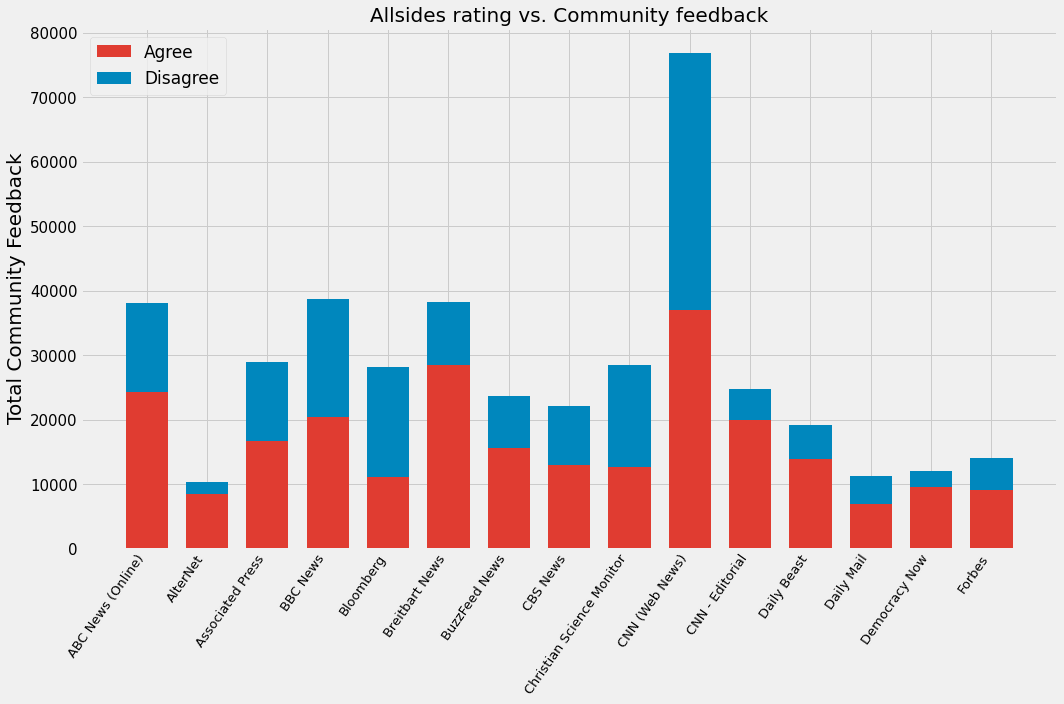

In [137]:
df2 = df.head(15).copy() # copys the first 15 from data.

fg, ax = plt.subplots(figsize=(15,10))

news_source = df2['News Source']
print(news_source)
news_source = np.arange(len(news_source))
print(news_source)
width = 0.7

plt.bar(news_source, df2['Agree'],
        color='#E03C31', width=width, label='Agree')
plt.bar(news_source, df2['Disagree'],
        color='#0087BD', width=width, bottom=df2['Agree'], label='Disagree')

plt.xticks(ticks=news_source, labels=df2['News Source'], rotation=55, ha='right', fontsize="13")
plt.yticks(fontsize="15")

plt.legend(loc='upper left', fontsize=17)
plt.title('Allsides rating vs. Community feedback', fontsize=20)
plt.ylabel('Total Community Feedback', fontsize=20)
plt.tight_layout()
plt.grid(True)
plt.show()  # To make the plot appear


## Data in a Pie Chart:

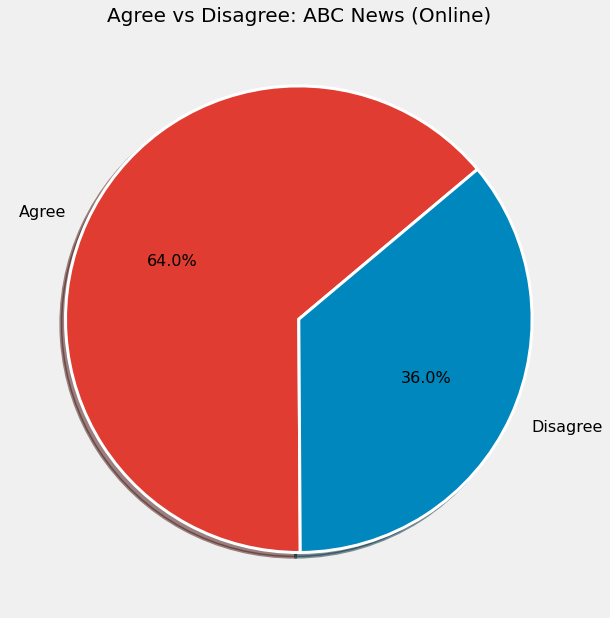

In [138]:
df4 = df.copy()

plt.figure(figsize=(15,10))


news_title = df4['News Source'][0]

agree = df4['Agree'].unique()[0]
disagree = df4['Disagree'].unique()[0]

slices = [agree, disagree]
colors =['#E03C31','#0087BD']
labels =['Agree', 'Disagree']

plt.pie(slices, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', 
        textprops={'color': 'black', 'fontsize': '16'}, startangle=40, wedgeprops={'edgecolor': 'white', 'linewidth': '3'})


plt.title('Agree vs Disagree' + ': ' + news_title, fontsize=20)
plt.show()  # To make the plot appear

0     8547.0
1    15664.0
2    19958.0
3    13898.0
4     9651.0
Name: agree, dtype: float64
---------------------
0    1880.0
1    8109.0
2    4827.0
3    5246.0
4    2471.0
Name: disagree, dtype: float64
---------------------
0           AlterNet
1      BuzzFeed News
2    CNN - Editorial
3        Daily Beast
4      Democracy Now
Name: news, dtype: object
---------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
---------------------
[0 1 2 3 4]
---------------------
5
---------------------
5
---------------------
5
---------------------


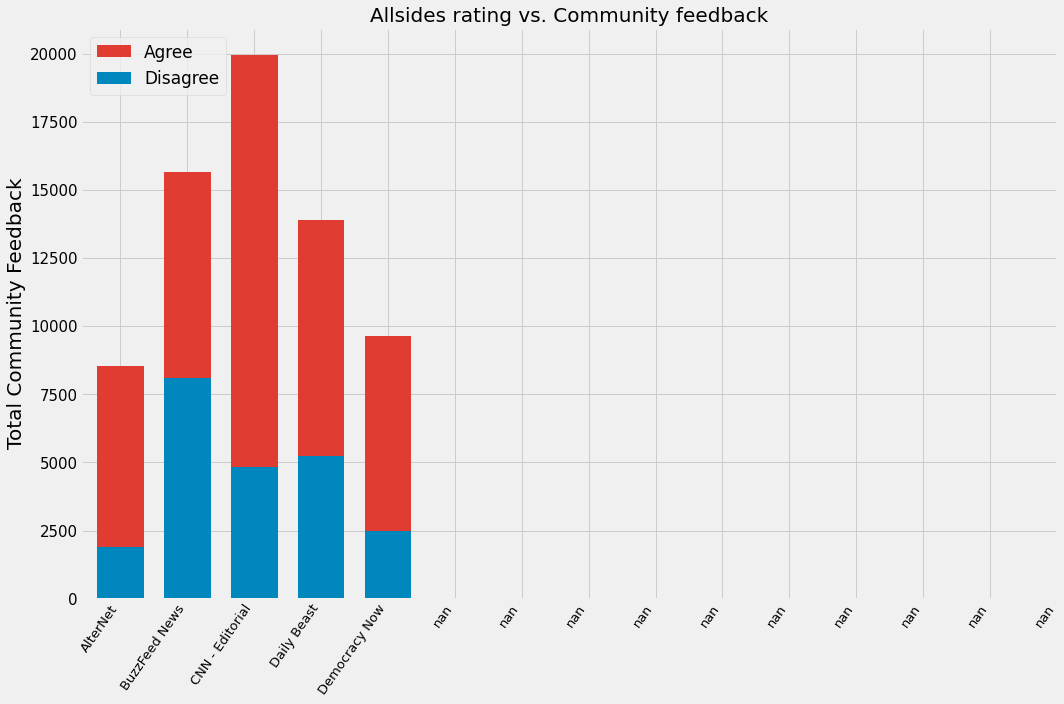

In [288]:
df3 = df.head(15).copy()  # copys the first 15 from data.

fg, ax = plt.subplots(figsize=(15, 10))

df3['agree'] = df3[df3['AllSides Bias Rating'] == 'left']['Agree']
df3['disagree'] = df3[df3['AllSides Bias Rating'] == 'left']['Disagree']
print(df3['agree'].dropna().reset_index(drop=True))
print('---------------------')
print(df3['disagree'].dropna().reset_index(drop=True))
print('---------------------')
# title = df3['AllSides Bias Rating']
df3['news'] = df3[df3['AllSides Bias Rating'] == 'left']['News Source'].reset_index(drop=True)
news_source = np.arange(len(df3['news']))
news_sourcezzz = np.arange(len(df3['news'].dropna()))
# df3['news'].dropna().unique()

# label = df3['news'].dropna().unique()
# label2 = df3['news'].dropna()

print(df3['news'].dropna())
# print(df3['news'].dropna().unique())

print('---------------------')
print(news_source)
print('---------------------')
print(news_sourcezzz)
print('---------------------')
print(len(df3['news'].dropna()))
print('---------------------')
print(len(news_sourcezzz))
print('---------------------')
print(len(df3['agree'].dropna()))
print('---------------------')

width = 0.7

plt.bar(news_sourcezzz, df3['agree'].reset_index(drop=True).dropna(), color='#E03C31', width=width, label='Agree')
plt.bar(news_sourcezzz, df3['disagree'].dropna().reset_index(drop=True), color='#0087BD', width=width, label='Disagree')

plt.xticks(ticks=news_source, labels=df3['news'], rotation=55, ha='right', fontsize="13")
plt.yticks(fontsize="15")

plt.legend(loc='upper left', fontsize=17)
plt.title('Allsides rating vs. Community feedback', fontsize=20)
plt.ylabel('Total Community Feedback', fontsize=20)
plt.tight_layout()
plt.show()  # To make the plot appear


In [140]:
df 

,News Source,AllSides Bias Rating,News Media Info,Agree,Disagree,Ratio,Community feedback,News Source Site,Established,Owned by
0,ABC News (Online),left-center,https://www.allsides.com/news-source/abc-news-...,24373,13717,1.777,Agree,http://abcnews.go.com/,6/15/1945,The Walt Disney Company
1,AlterNet,left,https://www.allsides.com/news-source/alternet-...,8547,1880,4.546,Absolutely agree,http://www.alternet.org/,,Independent Media Institute
2,Associated Press,center,https://www.allsides.com/news-source/associate...,16659,12341,1.350,Somewhat agree,https://apnews.com/,1846,"Cooperatively owned by 1,500 member news outlets"
3,BBC News,center,https://www.allsides.com/news-source/bbc-news-...,20374,18314,1.112,Somewhat agree,http://www.bbc.com/,10/18/1922,British Public
4,Bloomberg,left-center,https://www.allsides.com/news-source/bloomberg...,11155,17016,0.656,Disagree,http://www.bloomberg.com/,1990,Bloomberg LP (Michael Bloomberg CEO)
5,Breitbart News,right,https://www.allsides.com/news-source/breitbart,28556,9716,2.939,Strongly agree,http://www.breitbart.com/,2007,Breitbart News Network LLC
6,BuzzFeed News,left,https://www.allsides.com/news-source/buzzfeed-...,15664,8109,1.932,Agree,http://buzzfeednews.com,November 2011,BuzzFeed
7,CBS News,left-center,https://www.allsides.com/news-source/cbs-news-...,13060,9047,1.444,Somewhat agree,http://www.cbsnews.com/,9/18/1927,CBS Corporation
8,Christian Science Monitor,center,https://www.allsides.com/news-source/christian...,12643,15862,0.797,Somewhat disagree,http://www.csmonitor.com/,1908,"The First Church of Christ, Scientist"
9,CNN (Web News),left-center,https://www.allsides.com/news-source/cnn-media...,37093,39831,0.931,Somewhat disagree,http://www.cnn.com,6/1/1980,Turner Broadcasting System


In [141]:
df3['agree'] = df3[df3['AllSides Bias Rating'] == 'left']['Agree']#.reset_index(drop=True)
print(df3['agree'])#.dropna())
print('------------------------')
agree = df3[df3['AllSides Bias Rating'] == 'left']
print(agree)

0         NaN
1      8547.0
2         NaN
3         NaN
4         NaN
5         NaN
6     15664.0
7         NaN
8         NaN
9         NaN
10    19958.0
11    13898.0
12        NaN
13     9651.0
14        NaN
Name: agree, dtype: float64
------------------------
        News Source AllSides Bias Rating  \
1          AlterNet                 left   
6     BuzzFeed News                 left   
10  CNN - Editorial                 left   
11      Daily Beast                 left   
13    Democracy Now                 left   

                                      News Media Info  Agree  Disagree  Ratio  \
1   https://www.allsides.com/news-source/alternet-...   8547      1880  4.546   
6   https://www.allsides.com/news-source/buzzfeed-...  15664      8109  1.932   
10  https://www.allsides.com/news-source/cnn-edito...  19958      4827  4.135   
11  https://www.allsides.com/news-source/daily-bea...  13898      5246  2.649   
13  https://www.allsides.com/news-source/democracy...   9651      2

In [142]:
df3['AllSides Bias Rating']

0     left-center
1            left
2          center
3          center
4     left-center
5           right
6            left
7     left-center
8          center
9     left-center
10           left
11           left
12          right
13           left
14         center
Name: AllSides Bias Rating, dtype: object

In [196]:
# for i in df3[df3['AllSides Bias Rating'] == 'left']['News Source']:
#     print(i)
    
